## Initial Imports

In [2]:
# ============================================
#  Embedded Machine Learning Lab Exam Notebook
#  Pipeline: Q1 → Q5
#  Dataset: heart_failure_clinical_records_dataset.csv
# ============================================

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Q1

In [4]:
# ================================
# Q1 – Load & explore dataset
# ================================

df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# ✅ Basic overview
print("\n--- DataFrame Head ---")
display(df.head())

print("\n--- DataFrame Shape ---")
print(df.shape)

print("\n--- DataFrame Info ---")
df.info()

print("\n--- Summary Stats ---")
display(df.describe())

print("\n--- Column Names ---")
print(df.columns)

# ✅ Feature + Target definitions
print("\n--- Column Names ---")
print(df.columns)

target = "DEATH_EVENT"
features = [c for c in df.columns if c != target]
print("\nTarget:", target)
print("\nFeatures:", features)


--- DataFrame Head ---


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1



--- DataFrame Shape ---
(299, 13)

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: flo

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000



--- Column Names ---
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

--- Column Names ---
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Target: DEATH_EVENT

Features: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']


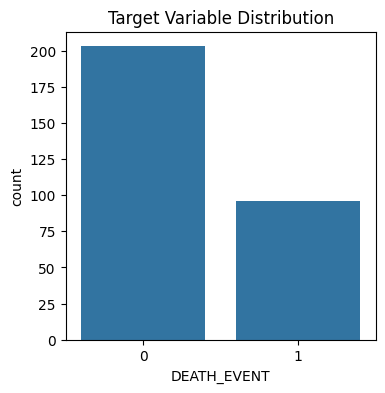

In [5]:
# ✅ Visualize distribution of target
plt.figure(figsize=(4,4))
sns.countplot(data=df, x=target)
plt.title("Target Variable Distribution")
plt.show()

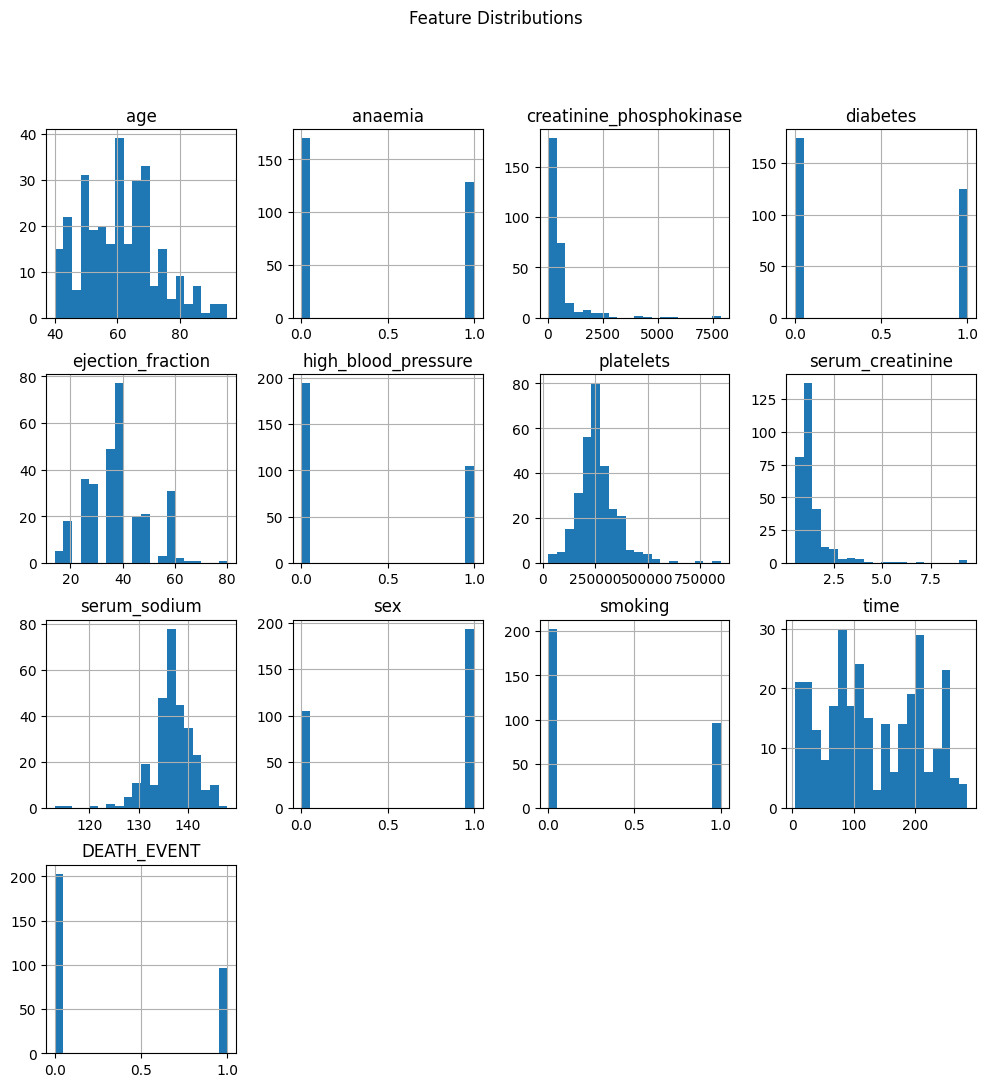

In [6]:
# ✅ Visualize distributions (features)
df.hist(bins=20, figsize=(12,12))
plt.suptitle("Feature Distributions")
plt.show()

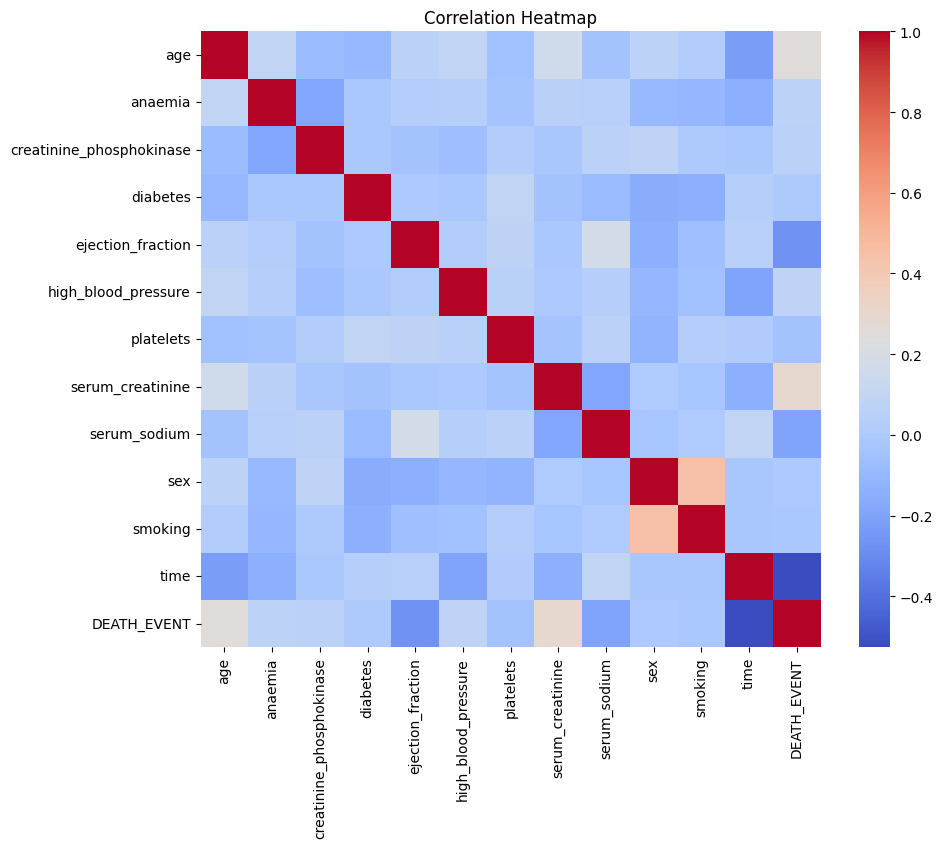

In [7]:
# ✅ Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Q2

In [8]:
# ================================
# Q2 – Preprocessing & Feature Eng
# ================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# ✅ Check missing values
print("\n--- Missing Values ---")
print(df.isna().sum())


# ✅ Example: fill missing with median
df_filled = df.copy()
df_filled = df_filled.fillna(df_filled.median())


# ✅ Detect outliers using IQR
Q1 = df_filled.quantile(0.25)
Q3 = df_filled.quantile(0.75)
IQR = Q3 - Q1
outliers = (df_filled < (Q1 - 1.5 * IQR)) | (df_filled > (Q3 + 1.5 * IQR))
print("\n--- Outlier counts per feature ---")
print(outliers.sum())


--- Missing Values ---
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

--- Outlier counts per feature ---
age                          0
anaemia                      0
creatinine_phosphokinase    29
diabetes                     0
ejection_fraction            2
high_blood_pressure          0
platelets                   21
serum_creatinine            29
serum_sodium                 4
sex                          0
smoking                      0
time                         0
DEATH_EVENT                  0
dtype: int64


In [ ]:
# ✅ Categorical / numeric separation
num_features = df_filled.drop(columns=[target]).select_dtypes(include=['int64','float64']).columns
cat_features = df_filled.drop(columns=[target]).select_dtypes(include=['object']).columns

print("\nNumeric:", list(num_features))
print("Categorical:", list(cat_features))



Numeric: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
Categorical: []


In [10]:
# ✅ Preprocessing pipeline
numerical_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

categorical_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="most_frequent")),
    ("encode", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", numerical_pipeline, num_features),
    ("cat", categorical_pipeline, cat_features)
])

# ✅ (Optional) Feature selection — example: SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

feature_selector = SelectKBest(score_func=f_classif, k="all")

# Q3


In [11]:
# ================================
# Q3 – Model: DT, RF, SVM
# ================================

from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X = df_filled[features]
y = df_filled[target]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

results = {}

for model_name, model in models.items():
    pipe = Pipeline([
        ("pre", preprocessor),
        ("select", feature_selector),
        ("clf", model),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\n=== {model_name} ===")
    print(classification_report(y_test, y_pred))

    results[model_name] = acc

print("\n--- Model Accuracy Comparison ---")
print(results)


=== Decision Tree ===
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        41
           1       0.60      0.47      0.53        19

    accuracy                           0.73        60
   macro avg       0.69      0.66      0.67        60
weighted avg       0.72      0.73      0.72        60


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        41
           1       0.80      0.63      0.71        19

    accuracy                           0.83        60
   macro avg       0.82      0.78      0.79        60
weighted avg       0.83      0.83      0.83        60


=== SVM ===
              precision    recall  f1-score   support

           0       0.78      0.93      0.84        41
           1       0.73      0.42      0.53        19

    accuracy                           0.77        60
   macro avg       0.75      0.67      0.69        60
weighted avg   

# Q4

In [ ]:
# ================================
# Q4 – Hyperparameter Tuning
# ================================

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


# ✅ Choose model: RF or SVM
# Here example = Random Forest
model = RandomForestClassifier(random_state=42)


pipe = Pipeline([
    ("pre", preprocessor),
    ("select", feature_selector),
    ("clf", model)
])

# Parameter grids
param_grid = {
    "clf__n_estimators": [50, 100, 200],
    "clf__max_depth": [None, 5, 10, 20],
    "clf__min_samples_split": [2, 5, 10],
}

# ✅ Grid Search
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("\nBest Parameters (GridSearch):")
print(grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters (GridSearch):
{'clf__max_depth': 5, 'clf__min_samples_split': 5, 'clf__n_estimators': 50}
Best Score: 0.8703014184397162


In [13]:
# ✅ Randomized Search
param_dist = {
    "clf__n_estimators": [50, 100, 200, 300],
    "clf__max_depth": [None, 10, 20, 30],
    "clf__min_samples_split": [2, 5, 10],
}

random_search = RandomizedSearchCV(pipe, param_dist, cv=5, scoring='accuracy',
                                   n_iter=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

print("\nBest Parameters (RandomSearch):")
print(random_search.best_params_)
print("Best Score:", random_search.best_score_)


Best Parameters (RandomSearch):
{'clf__n_estimators': 300, 'clf__min_samples_split': 5, 'clf__max_depth': 30}
Best Score: 0.861968085106383


# Q5

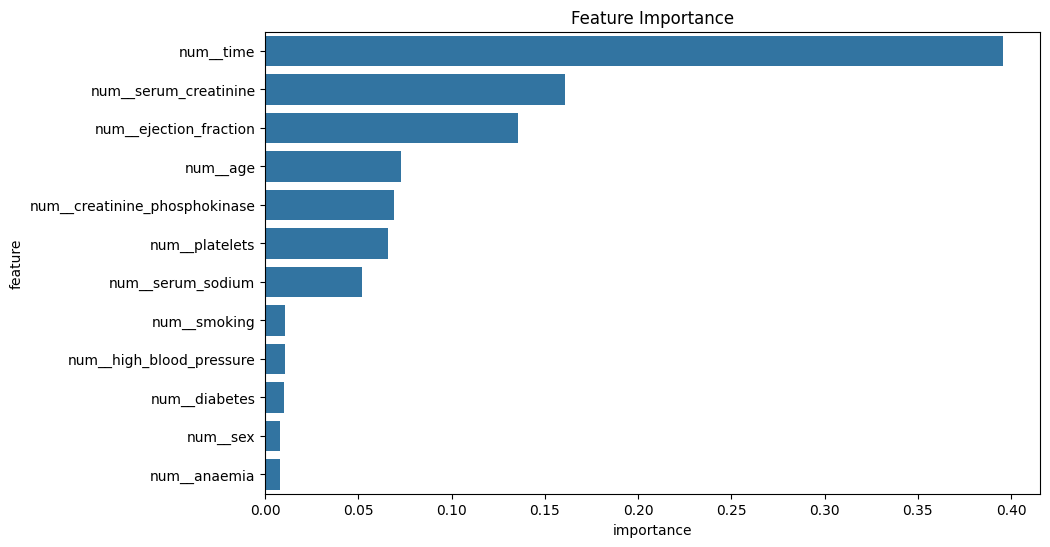


=== Top Features ===


,feature,importance
11,num__time,0.395836
7,num__serum_creatinine,0.160881
4,num__ejection_fraction,0.135624
0,num__age,0.072814
2,num__creatinine_phosphokinase,0.068895
6,num__platelets,0.066100
8,num__serum_sodium,0.052198
10,num__smoking,0.010546
5,num__high_blood_pressure,0.010429
3,num__diabetes,0.010316


In [17]:
# ================================
# Q5 – Visualization & Insights
# ================================

best_model = random_search.best_estimator_

from sklearn.inspection import permutation_importance

# 1) Get transformed feature names properly
pre = best_model.named_steps["pre"]
feature_names = pre.get_feature_names_out()

# 2) Feature importance
# (RandomForest supports .feature_importances_)
clf = best_model.named_steps["clf"]

importances = clf.feature_importances_

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

# 3) Plot
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp, x="importance", y="feature")
plt.title("Feature Importance")
plt.show()

# 4) Insights
print("\n=== Top Features ===")
display(feat_imp.head(10))
